In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from natsort import natsorted

%matplotlib inline

## use type 1 fonts only (required for AAAI publication)
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# files to evaluate
af = pd.read_csv('../jan-30-2020-110512-results.csv')
bf = pd.read_csv('../data/mar-23-2019-results.csv')

mf = af.append(bf)

cov = mf.groupby(
    by=['Config', 'Domain', 'Problem'])['Plan'].first().groupby(
    by=['Config', 'Domain']).count().unstack('Config').fillna(0)
cov = cov.reindex(columns=natsorted(cov.columns))
cov.sum().sort_values()
cov.style.highlight_max(axis=1, color='yellow')
#cov.sum()

Config,dmtb-ff1-t1,dmtb-ff1-t10,dmtb-ff1-t20,dmtb-ff1-t30,dmtb-ff1-t40,dmtb-ff1-t50,dmtb-ff1-t60,dmtb-ff1-t70,dmtb-ff1-t80,dmtb-ff1-t90,dmtb-ff1-t100,dmtb-ff1-t110,dmtb-ff1-t120,dmtb-ff1-t130,dmtb-ff1-t140,dmtb-ff1-t150,dmtb-ff1-t160,dmtb-ff1-t170,dmtb-ff1-t180,dmtb-ff1-t190,dmtb-ff1-t200,dmtb-ff1-t210,dmtb-ff1-t220,dmtb-ff1-t230,dmtb-ff1-t240,dmtb-ff1-t250,dmtb-ff1-t260,dmtb-ff1-t270,dmtb-ff1-t280,dmtb-ff1-t290,dmtb-ff1-t300,dmtb-ff1-t310,dmtb-ff1-t320,dmtb-ff1-t330,dmtb-ff1-t340,dmtb-ff1-t350,dmtb-ff1-t360,dmtb-ff1-t370,dmtb-ff1-t380,dmtb-ff1-t390,dmtb-ff1-t400,dmtg-ff1-t1,dmtg-ff1-t10,dmtg-ff1-t20,dmtg-ff1-t30,dmtg-ff1-t40,dmtg-ff1-t50,dmtg-ff1-t60,dmtg-ff1-t70,dmtg-ff1-t80,dmtg-ff1-t90,dmtg-ff1-t100,dmtg-ff1-t110,dmtg-ff1-t120,dmtg-ff1-t130,dmtg-ff1-t140,dmtg-ff1-t150,dmtg-ff1-t160,dmtg-ff1-t170,dmtg-ff1-t180,dmtg-ff1-t190,dmtg-ff1-t200,dmtg-ff1-t210,dmtg-ff1-t220,dmtg-ff1-t230,dmtg-ff1-t240,dmtg-ff1-t250,dmtg-ff1-t260,dmtg-ff1-t270,dmtg-ff1-t280,dmtg-ff1-t290,dmtg-ff1-t300,dmtg-ff1-t310,dmtg-ff1-t320,dmtg-ff1-t330,dmtg-ff1-t340,dmtg-ff1-t350,dmtg-ff1-t360,dmtg-ff1-t370,dmtg-ff1-t380,dmtg-ff1-t390,dmtg-ff1-t400,dmtu,dmtu-ff1-t100,mafs-ff1-t1,mafs-ff1-t10,mafs-ff1-t20,mafs-ff1-t30,mafs-ff1-t40,mafs-ff1-t50,mafs-ff1-t60,mafs-ff1-t70,mafs-ff1-t80,mafs-ff1-t90,mafs-ff1-t100,mafs-ff1-t110,mafs-ff1-t120,mafs-ff1-t130,mafs-ff1-t140,mafs-ff1-t150,mafs-ff1-t160,mafs-ff1-t170,mafs-ff1-t180,mafs-ff1-t190,mafs-ff1-t200,mafs-ff1-t210,mafs-ff1-t220,mafs-ff1-t230,mafs-ff1-t240,mafs-ff1-t250,mafs-ff1-t260,mafs-ff1-t270,mafs-ff1-t280,mafs-ff1-t290,mafs-ff1-t300,mafs-ff1-t310,mafs-ff1-t320,mafs-ff1-t330,mafs-ff1-t340,mafs-ff1-t350,mafs-ff1-t360,mafs-ff1-t370,mafs-ff1-t380,mafs-ff1-t390,mafs-ff1-t400
Domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
blocksworld,15,6,3,2,3,4,5,1,0,3,4,2,2,3,4,2,3,3,0,6,2,2,1,2,3,1,2,4,4,4,2,3,0,1,1,1,1,3,2,2,3,0,6,10,12,12,15,16,14,14,17,16,18,19,16,18,15,18,19,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,9,2,0,8,13,11,12,17,18,16,15,16,18,16,17,18,16,18,19,18,17,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
depot,1,2,2,2,2,3,3,3,2,2,3,3,2,3,2,3,2,2,2,2,3,2,2,2,3,3,2,2,2,2,3,2,2,2,2,2,2,3,2,2,3,4,5,4,4,4,5,6,4,4,4,4,4,3,4,5,3,4,3,3,3,3,4,4,5,4,3,4,4,4,4,4,5,3,4,5,4,4,3,5,4,4,2,2,3,2,2,2,4,4,3,3,3,3,3,3,2,3,4,2,3,2,2,2,1,5,2,3,4,3,4,3,2,3,3,4,2,2,2,3,2,1,3,2,3
driverlog,15,15,15,16,15,15,17,16,17,17,17,18,17,17,17,17,19,17,18,18,18,18,18,17,18,18,17,18,19,18,17,18,17,17,18,18,17,18,17,18,18,17,20,20,20,20,20,20,20,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,15,18,18,20,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
elevators08,4,4,5,6,6,6,6,5,7,6,6,5,5,6,5,5,5,6,6,6,4,6,6,5,7,6,3,5,6,6,6,4,5,5,5,5,6,6,5,7,5,10,10,10,9,11,10,7,10,9,9,11,8,9,10,11,10,9,10,8,12,11,11,9,11,11,9,11,8,12,11,7,10,11,8,8,12,11,10,9,11,11,5,5,13,10,12,12,12,12,14,13,14,12,13,12,13,15,11,14,14,14,12,12,12,15,13,12,14,13,11,13,12,13,13,12,11,13,16,12,16,14,14,12,13
logistics00,3,3,5,4,7,6,6,7,5,5,8,6,6,6,7,6,7,5,6,6,7,7,5,7,7,7,6,6,7,7,7,5,7,7,5,5,6,6,6,6,7,16,16,19,19,19,19,19,18,19,17,19,18,20,20,19,19,18,18,17,19,19,19,17,15,18,19,19,19,19,16,16,16,17,19,18,18,19,17,18,16,19,2,6,20,20,20,20,18,19,20,19,20,19,20,18,18,18,20,19,19,20,19,18,17,18,19,20,20,19,18,19,20,19,18,20,19,20,18,18,18,20,19,18,20
productionsite,20,21,25,26,24,23,26,25,24,25,26,25,25,25,25,23,26,23,26,25,25,26,25,26,24,24,25,25,24,24,25,25,25,26,26,25,26,24,25,23,25,29,30,29,30,24,24,23,23,27,26,27,28,23,23,29,24,24,25,25,27,26,25,28,25,24,23,24,25,27,26,25,25,26,24,26,24,25,24,24,24,27,20,23,35,24,20,17,20,21,17,18,19,20,18,18,19,18,19,17,18,22,20,18,19,19,18,19,18,23,21,20,21,21,21,18,20,17,19,21,19,21,20,20,18
rovers,7,11,10,12,15,15,14,17,16,15,17,18,18,17,18,18,18,17,18,17,18,18,16,17,16,17,17,18,17,18,18,18,16,17,

In [38]:
mf.head()

,AgentCount,AgentID,Config,Cost,Domain,Expansions,HeuristicValue,Makespan,MessagesIn,MessagesOut,Plan,Problem,Search,Seconds,Unnamed: 0,Unnamed: 0.1,t
0,10,9,dmtu-ff1-t100,61,taxi,188457.0,12,-1,627935,388035,0-70022,p20,NaN,1386.766630,NaN,NaN,NaN
1,5,0,dmtu-ff1-t100,238,driverlog,60669.0,31,-1,40195,43896,4-218656,pfile16,NaN,1178.586350,NaN,NaN,NaN
2,4,3,dmtu-ff1-t100,33,productionsite,155.0,8,-1,0,72,3-709,4-5-1-1,NaN,0.112214,NaN,NaN,NaN
3,5,1,dmtu,32,depot,1018.0,11,-1,1498,1344,1-1483,pfile4,NaN,3.818248,NaN,NaN,NaN
4,4,2,dmtu-ff1-t100,33,productionsite,156.0,12,-1,28,21,3-709,4-5-1-1,NaN,0.438774,NaN,NaN,NaN


In [39]:
from matplotlib import cm
plt.rcParams["figure.figsize"] = [5, 3.5] # width, height in inch

cmp = mf.groupby(
    by=['Domain', 'Problem', 'Config']).agg({
        'Expansions': 'sum',
        'MessagesOut': 'sum',
        'Cost': 'min',
        'Seconds': 'min',
    }).unstack('Config')
#cmp['Cost'].head()


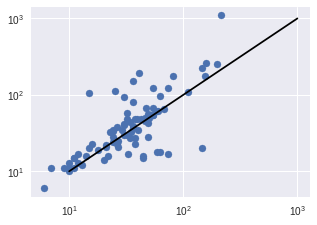

In [41]:
config='dmtu'
versus='mafs-ff1-t1'


f, ax = plt.subplots()
sctrs = ax.scatter(
    x=cmp.Cost[config],
    y=cmp.Cost[versus],
    #c=colors,
    #s=.5,
)

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(*([1e1,1e3], [1e1,1e3]), c='black')